## Reaction rate constant prediction
This file runs predicion of logK of X + OH reactions

## Import needed libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
#from ipynb.fs.full.Data import make_df
from ipynb.fs.full.Get_fingerprints import get_rdkit_fingerprint, get_cp_fingerprint
from ipynb.fs.full.Utils import plot_results, plot_arrhenius_params
from ipynb.fs.full.Evaluate import evaluate_model, cross_validate, run_ensamble
%matplotlib inline

## Load data from .csv  and calculate molecule features
Calls Data file to load data from .csv files. Full information on where the data comes from is found there. The target $k$ is in $cm^3 molec^{-1} s^{-1}$ units and is $log_{10}$ transformed. Then Get_fingerprints file is used to get Rdkit and chemprop features. More details available there.

In [34]:
# df = make_df()
# df = df.join(get_rdkit_fingerprint(df))
# cp_input = pd.read_csv('./Data/ensamble1.csv')
# cp_features = cp_input.iloc[:,cp_input.columns != 'smiles']
# df = df.join(cp_features)
# df.n.loc[(~df.A.isna() & df.n.isna())]=0
# df.A = np.log10(df.A)
# df
# df = make_df()
df = pd.read_csv('./Data/df.csv')
df = df.join(get_rdkit_fingerprint(df))
cp_input = pd.read_csv('./Data/VOCensamble0.csv')
cp_features = cp_input.iloc[:,cp_input.columns != 'smiles']
df = df.join(cp_features,)
df

,Unnamed: 0,C.no,Compounds,smiles,InChi,InChiKey,Mwt,Atoms,Alternative Structure ID,Type,...,fp_1390,fp_1391,fp_1392,fp_1393,fp_1394,fp_1395,fp_1396,fp_1397,fp_1398,fp_1399
0,0,1.0,methane,C,InChI=1S/CH4/h1H4,VNWKTOKETHGBQD-UHFFFAOYSA-N,16.042460,CH4,NaN,1.0,...,0.0,0.103576,0.083245,0.240611,0.000000,0.000000,0.0,0.120855,0.0,0.0
1,1,2.0,formaldehyde,C=O,InChI=1S/CH2O/c1-2/h1H2,WSFSSNUMVMOOMR-UHFFFAOYSA-N,30.025980,CH2O,NaN,18.0,...,0.0,0.000000,0.000000,0.213487,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,2,3.0,methanol,CO,"InChI=1S/CH4O/c1-2/h2H,1H3",OKKJLVBELUTLKV-UHFFFAOYSA-N,32.041860,CH4O,CH3-OH,16.0,...,0.0,0.529638,0.089407,0.000000,0.000000,0.067955,0.0,0.000000,0.0,0.0
3,3,4.0,fluoromethane,CF,InChI=1S/CH3F/c1-2/h1H3,NBVXSUQYWXRMNV-UHFFFAOYSA-N,34.032923,CH3F,CH3-F,60.0,...,0.0,0.251215,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,4,5.0,formic acid,OC=O,"InChI=1S/CH2O2/c2-1-3/h1H,(H,2,3)",BDAGIHXWWSANSR-UHFFFAOYSA-N,46.025380,CH2O2,HCO-OH,21.0,...,0.0,0.033004,0.000000,0.174890,0.201836,0.026386,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,4478,8.0,chloromethane,CCl,InChI=1S/CH3Cl/c1-2/h1H3,NEHMKBQYUWJMIP-UHFFFAOYSA-N,50.487520,CH3Cl,CH3-Cl,60.0,...,0.0,0.216427,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4479,4479,8.0,chloromethane,CCl,InChI=1S/CH3Cl/c1-2/h1H3,NEHMKBQYUWJMIP-UHFFFAOYSA-N,50.487520,CH3Cl,CH3-Cl,60.0,...,0.0,0.216427,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4480,4480,8.0,chloromethane,CCl,InChI=1S/CH3Cl/c1-2/h1H3,NEHMKBQYUWJMIP-UHFFFAOYSA-N,50.487520,CH3Cl,CH3-Cl,60.0,...,0.0,0.216427,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4481,4481,8.0,chloromethane,CCl,InChI=1S/CH3Cl/c1-2/h1H3,NEHMKBQYUWJMIP-UHFFFAOYSA-N,50.487520,CH3Cl,CH3-Cl,60.0,...,0.0,0.216427,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


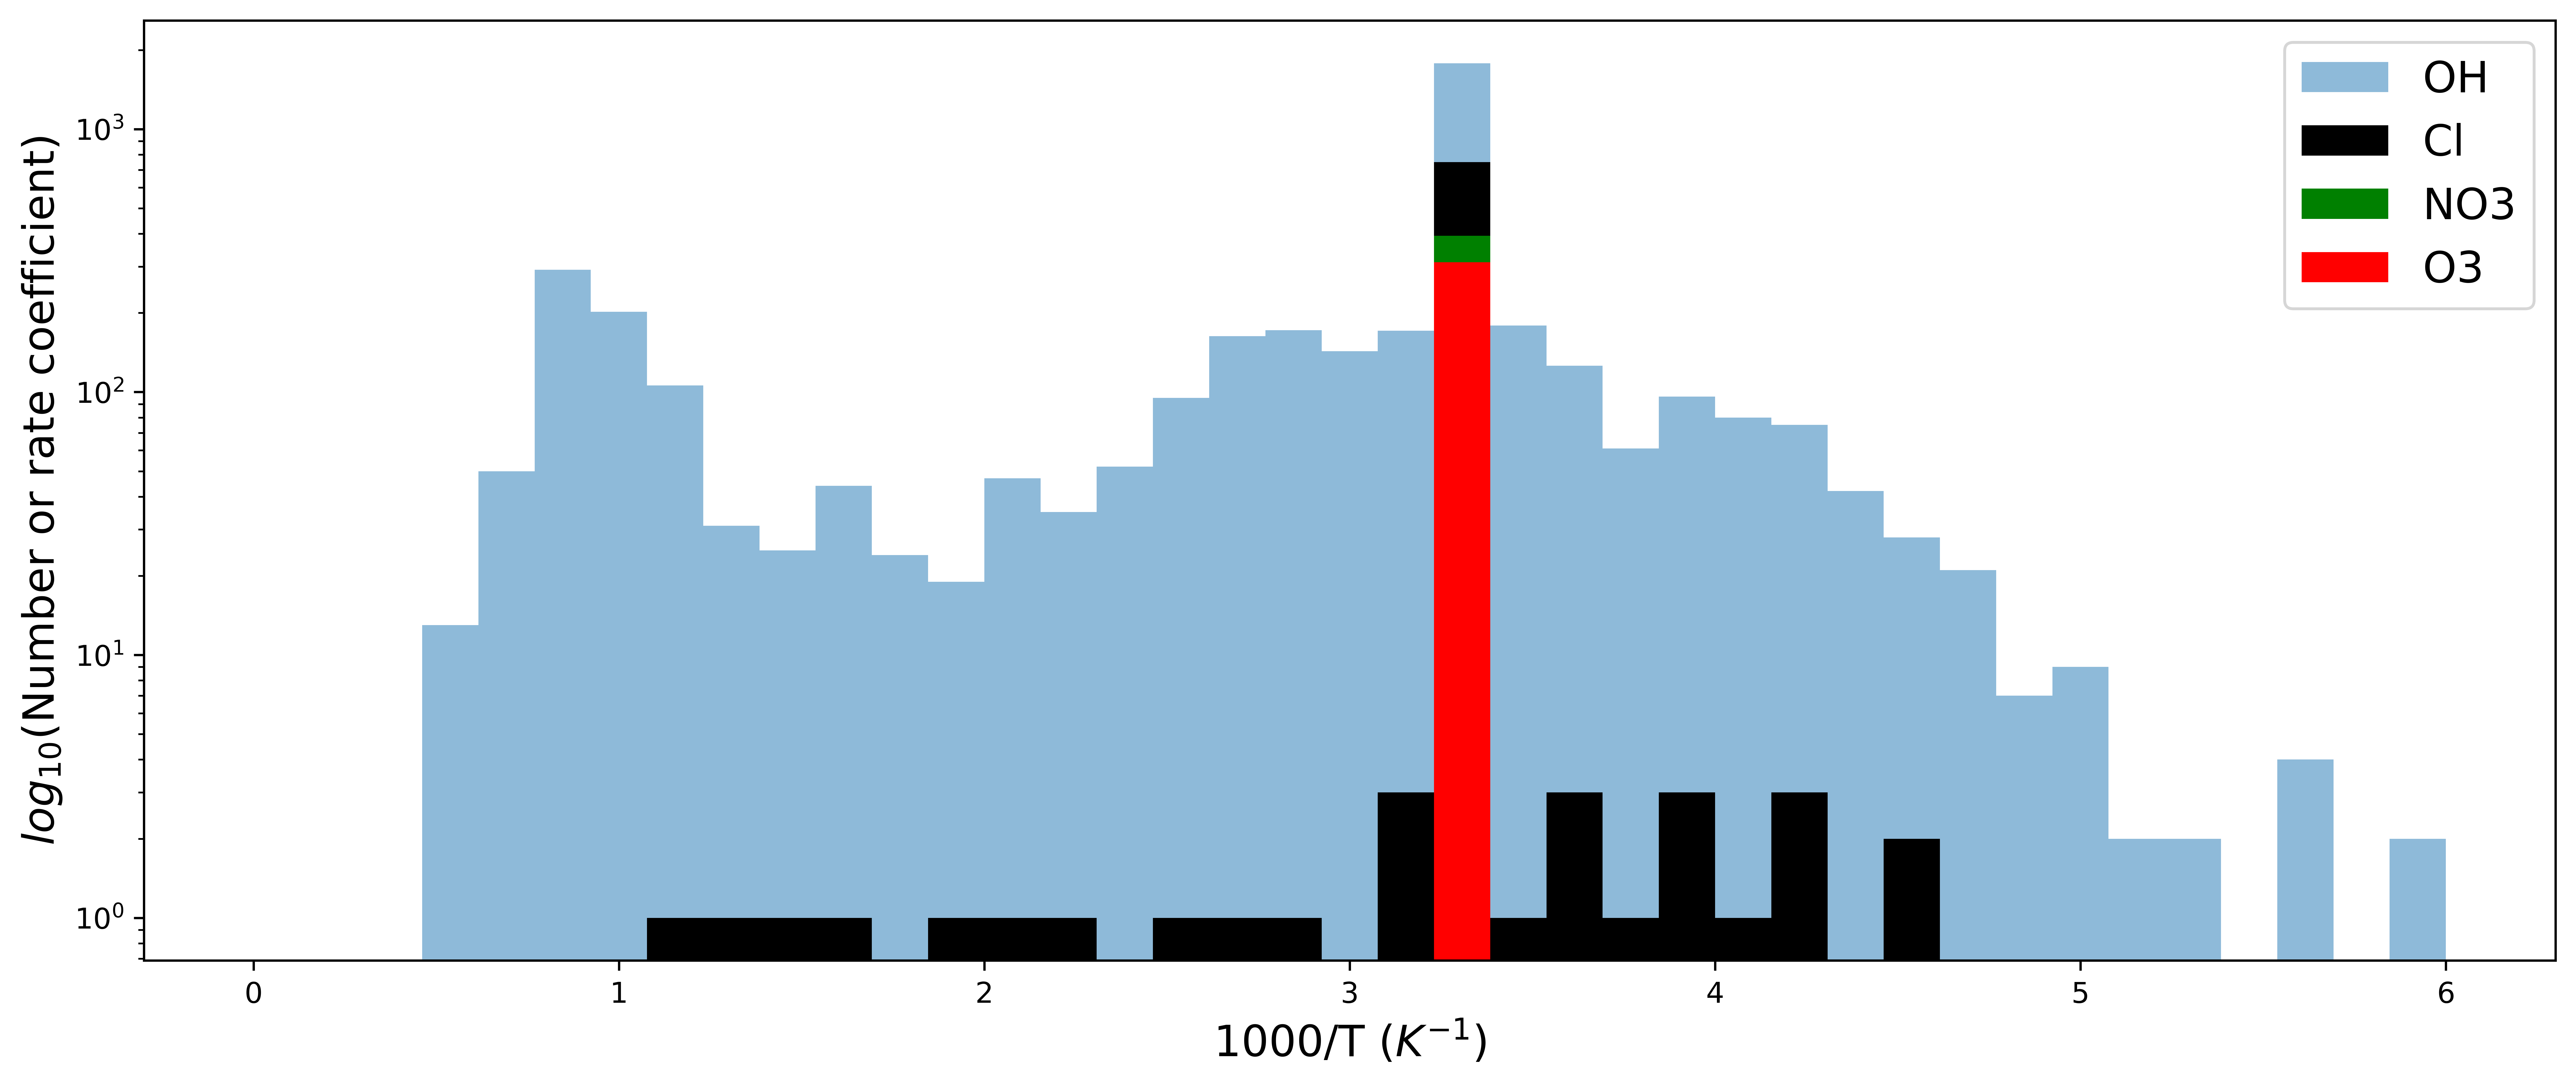

In [35]:
bins = np.linspace(0, 6, 40)
fig = plt.figure(figsize=(15, 6), dpi=800)
plt.hist(1000/df[~df['oh_logK'].isnull()]['T'],bins=bins,histtype='bar',label='OH',alpha=0.5,log=True)
plt.hist(1000/df[~df['cl_logK'].isnull()]['T'],bins=bins,color='black',histtype='bar',label='Cl',stacked=False)
plt.hist(1000/df[~df['no3_logK'].isnull()]['T'],bins=bins,color='green',histtype='bar',label='NO3',stacked=False)
plt.hist(1000/df[~df['o3_logK'].isnull()]['T'],bins=bins,color='red',histtype='bar',label='O3',stacked=False)
plt.xlabel('1000/T ($K^{-1}$)',fontsize=15)
plt.ylabel('$log_{10}$(Number or rate coefficient)',fontsize=15)
plt.legend(fontsize=15)


[Text(1.0, 1, '1000.0'),
 Text(2.0, 1, '500.0'),
 Text(3.0, 1, '333.3'),
 Text(4.0, 1, '250.0'),
 Text(5.0, 1, '200.0'),
 Text(6.0, 1, '166.7')]

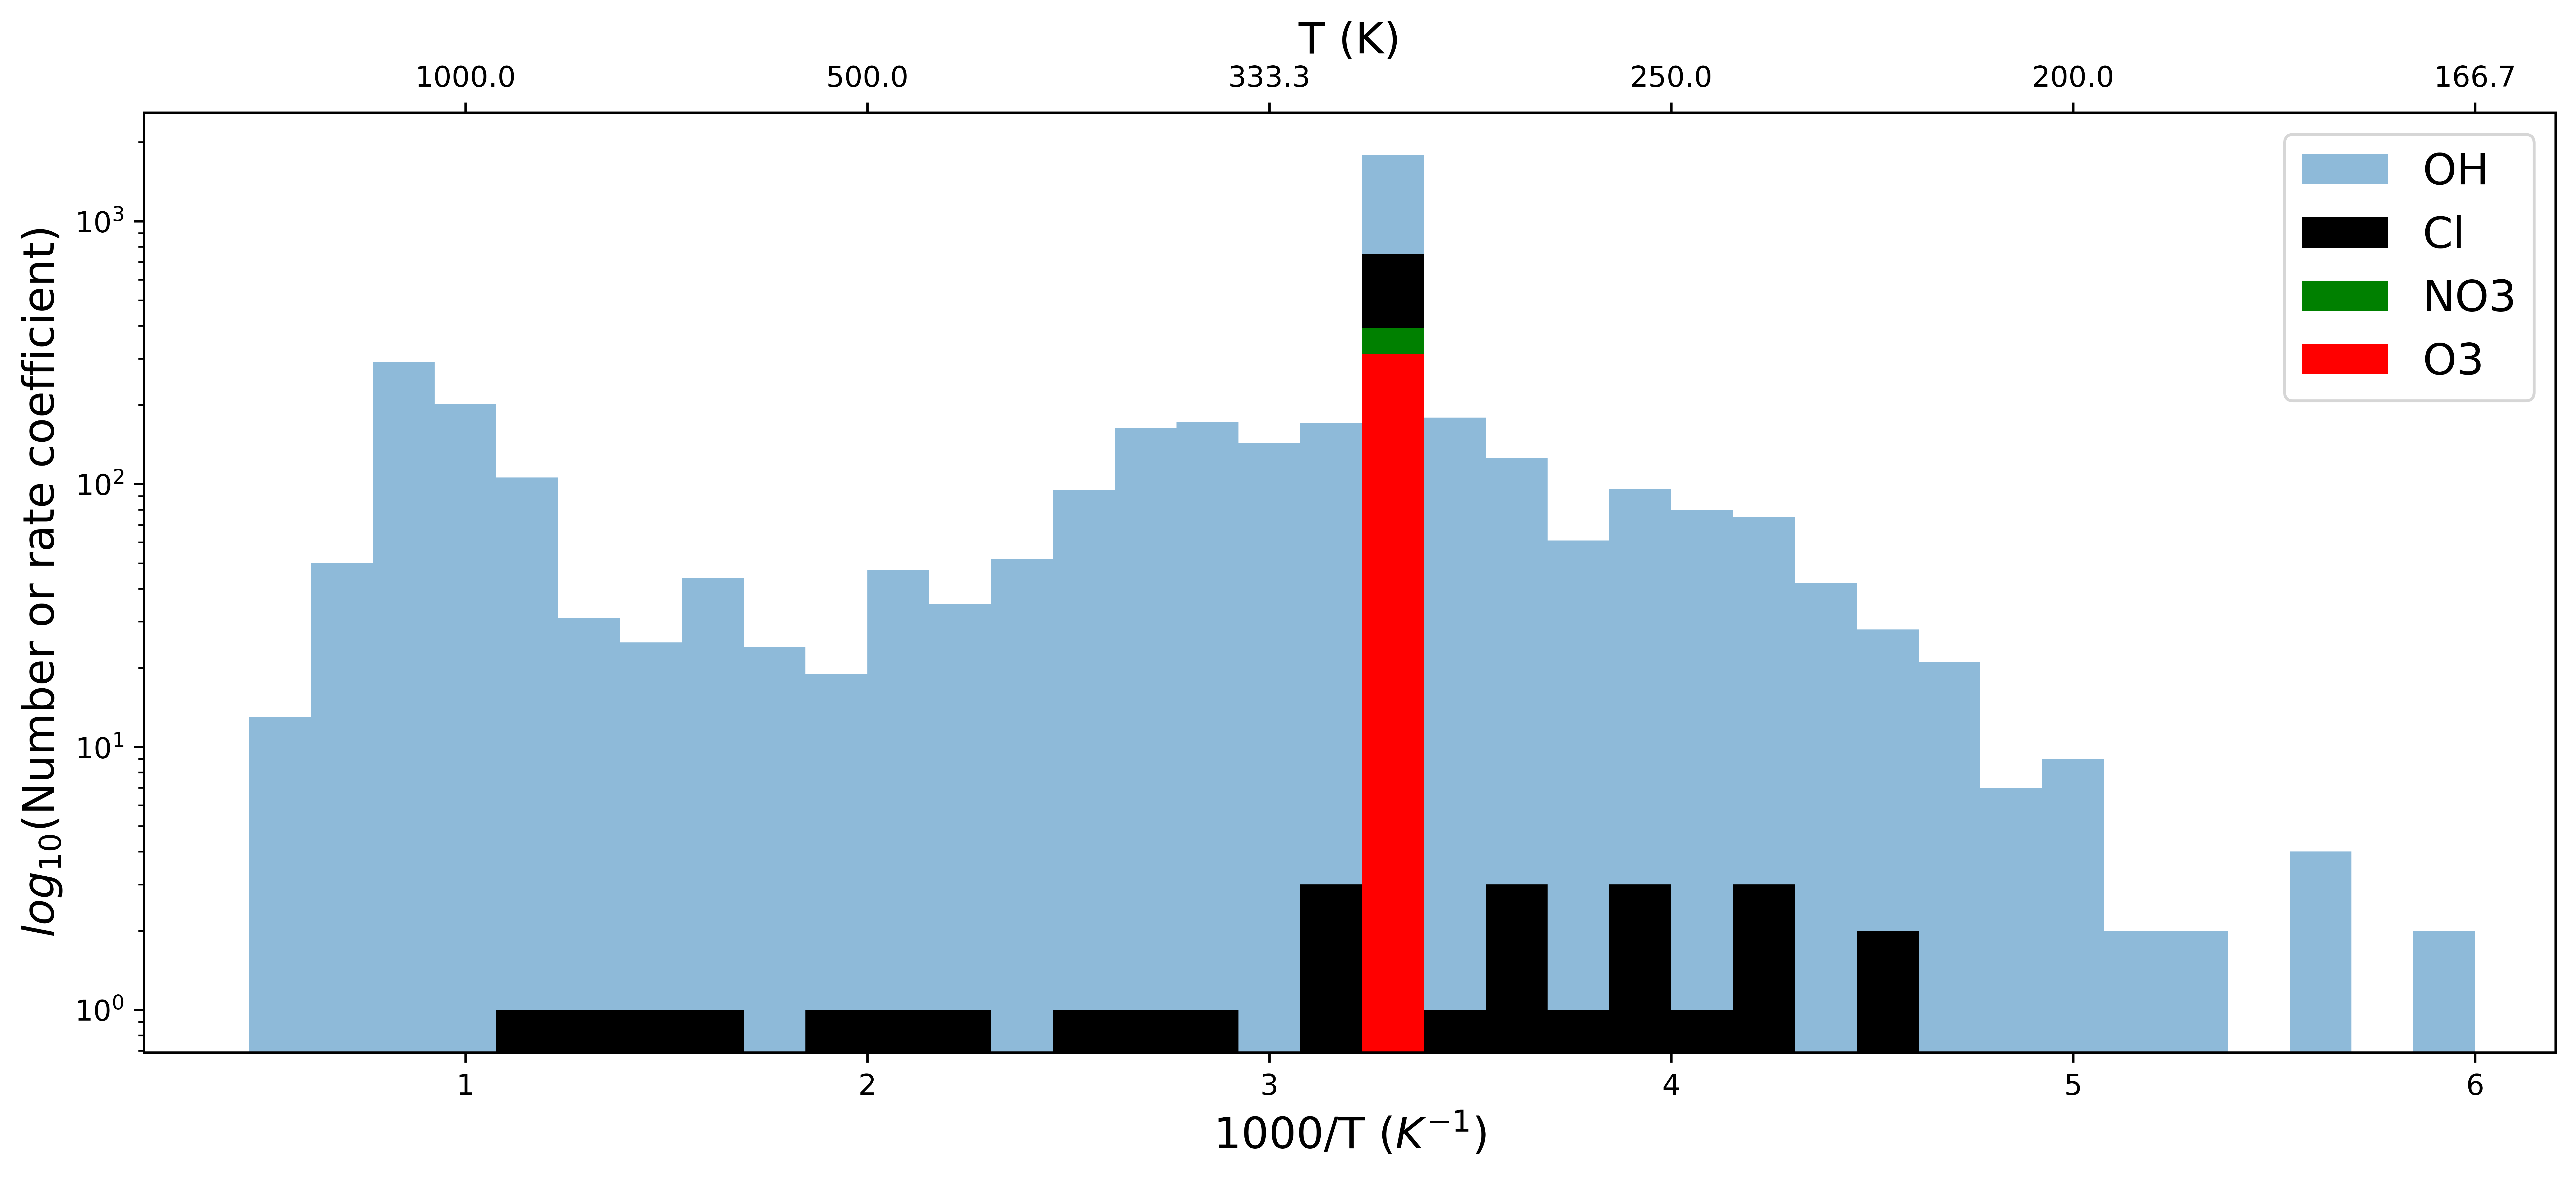

In [36]:
bins = np.linspace(0, 6, 40)
fig = plt.figure(figsize=(15, 6), dpi=800)
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.hist(1000/df[~df['oh_logK'].isnull()]['T'],bins=bins,histtype='bar',label='OH',alpha=0.5,log=True)
ax1.hist(1000/df[~df['cl_logK'].isnull()]['T'],bins=bins,color='black',histtype='bar',label='Cl',stacked=False)
ax1.hist(1000/df[~df['no3_logK'].isnull()]['T'],bins=bins,color='green',histtype='bar',label='NO3',stacked=False)
ax1.hist(1000/df[~df['o3_logK'].isnull()]['T'],bins=bins,color='red',histtype='bar',label='O3',stacked=False)
ax1.set_xlabel('1000/T ($K^{-1}$)',fontsize=15)
ax1.set_xlim([0.2,6.2])
ax1.set_ylabel('$log_{10}$(Number or rate coefficient)',fontsize=15)
ax1.legend(fontsize=15)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xlabel('T (K)',fontsize=15)
ax2.set_xticks(ax1.get_xticks()[1:-1])
def tick_function(X):
    V = 1/(X/1000)
    return ["%.1f" % z for z in V]
ax2.set_xticklabels(tick_function(ax1.get_xticks()[1:-1]))


In [37]:
ax1.get_xticks()[1:-1]

array([1., 2., 3., 4., 5., 6.])

In [58]:
dfr = df[['oh_logK','o3_logK','no3_logK','cl_logK']]
dfr2 = dfr.rename(columns={'oh_logK': '$logK_{OH}$','o3_logK': '$logK_{O_3}$','no3_logK': '$logK_{NO_3}$','cl_logK': '$logK_{Cl}$'})
dfr2

,$logK_{OH}$,$logK_{O_3}$,$logK_{NO_3}$,$logK_{Cl}$
0,-14.175224,NaN,NaN,-13.000000
1,-11.070581,NaN,-15.259637,-10.142668
2,-12.056505,NaN,-15.886057,-10.292430
3,-13.677781,NaN,NaN,-12.443697
4,-12.346787,NaN,NaN,-12.721246
...,...,...,...,...
4478,NaN,NaN,NaN,-11.121478
4479,NaN,NaN,NaN,-12.318759
4480,NaN,NaN,NaN,-12.301030
4481,NaN,NaN,NaN,-12.318759


In [39]:
corr2 = dfr.corr() # Calculates correlation matrix
corr.style.background_gradient(cmap='coolwarm') # This line plots nicely visualized matrix of correlation
plt.matshow(corr2)


NameError: name 'corr' is not defined

<Figure size 12000x4800 with 0 Axes>

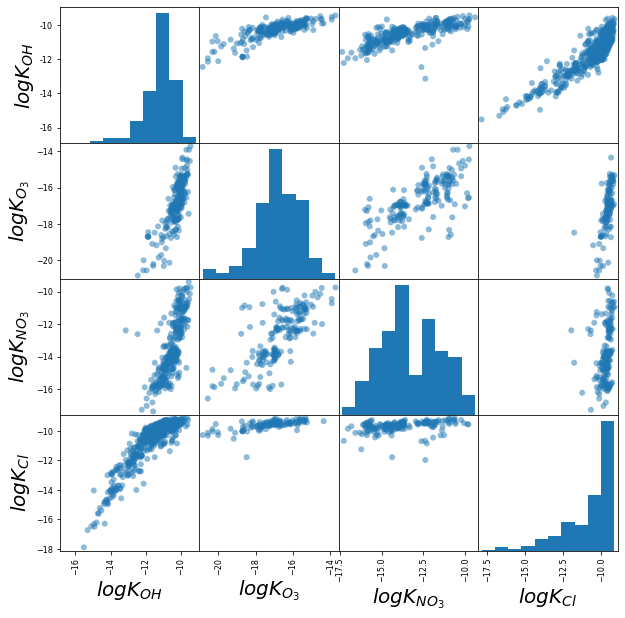

In [67]:
fig = plt.figure(figsize=(15, 6), dpi=800)

axes = pd.plotting.scatter_matrix(dfr2,marker='o',figsize=(10, 10))
#plt.yticks(fontsize = 2)
for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20)


In [44]:
axes.flatten()[0]

<AxesSubplot:xlabel='oh_logK', ylabel='oh_logK'>

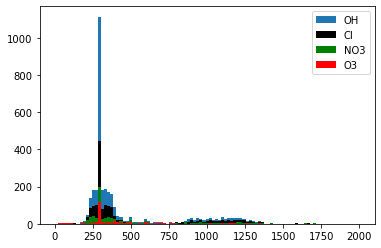

In [22]:
bins = np.linspace(0, 2000, 100)

plt.hist(df[~df['oh_A'].isnull()]['T'],bins=bins,histtype='bar',label='OH',stacked=True)
plt.hist(df[~df['cl_A'].isnull()]['T'],bins=bins,color='black',histtype='bar',label='Cl',stacked=True)
plt.hist(df[~df['no3_A'].isnull()]['T'],bins=bins,color='green',histtype='bar',label='NO3',stacked=True)
plt.hist(df[~df['o3_A'].isnull()]['T'],bins=bins,color='red',histtype='bar',label='O3',stacked=True)

plt.legend()

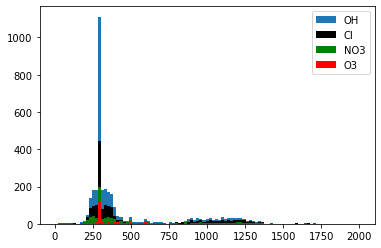

In [23]:
bins = np.linspace(0, 2000, 100)

plt.hist(df[~df['oh_B'].isnull()]['T'],bins=bins,histtype='bar',label='OH',stacked=True)
plt.hist(df[~df['cl_B'].isnull()]['T'],bins=bins,color='black',histtype='bar',label='Cl',stacked=True)
plt.hist(df[~df['no3_B'].isnull()]['T'],bins=bins,color='green',histtype='bar',label='NO3',stacked=True)
plt.hist(df[~df['o3_B'].isnull()]['T'],bins=bins,color='red',histtype='bar',label='O3',stacked=True)

plt.legend()

In [24]:
target_mols = ['OH','O3','NO3','Cl']
target_names= ['oh_A','o3_A','no3_A','cl_A']
tal = 0
for i,mol in enumerate(target_mols):
    print('##########',mol,'data stats: ##########')
    j = np.where(df.columns==target_names[i])[0][0]
    tal += print_count(df,train_mols,test_mols,j)
print(tal)

########## OH data stats: ##########


NameError: name 'print_count' is not defined

In [11]:
cp_input1 = pd.read_csv('./Data/VOCensamble1.csv')
cp_input2 = pd.read_csv('./Data/VOCensamble2.csv')
cp_input3 = pd.read_csv('./Data/VOCensamble3.csv')
cp_input4 = pd.read_csv('./Data/VOCensamble4.csv')

 ...]

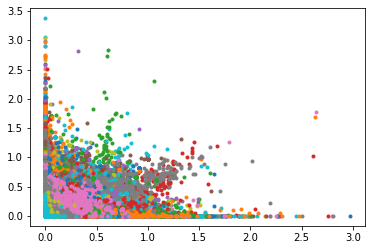

In [15]:
plt.plot(cp_input.iloc[:,cp_input.columns != 'smiles'],cp_input1.iloc[:,cp_input.columns != 'smiles'],'.')

 ...]

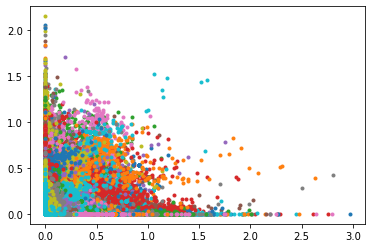

In [16]:
plt.plot(cp_input.iloc[:,cp_input.columns != 'smiles'],cp_input2.iloc[:,cp_input.columns != 'smiles'],'.')

## Split to train(80%)/test(20%) sets
Split dataset randomly based on unique molecules

In [3]:
seed = 10
np.random.seed(seed)
unique = df['smiles'].unique()
K = int(unique.shape[0]*.2)
options_test = unique[np.random.choice(unique.shape[0],size=K,replace=False)]
train_mols = shuffle(df.loc[~df['smiles'].isin(options_test)])
test_mols  = df.loc[ df['smiles'].isin(options_test)]
print('Total of',unique.shape[0],'molecules and',df.shape[0],'data points')
print('Training on',unique.shape[0]-K, 'molecules and',train_mols.shape[0],'data points')
print('Testing on', K,'molecules and',test_mols.shape[0],'data points')

Total of 1587 molecules and 4483 data points
Training on 1270 molecules and 3480 data points
Testing on 317 molecules and 1003 data points


Visualize data split:

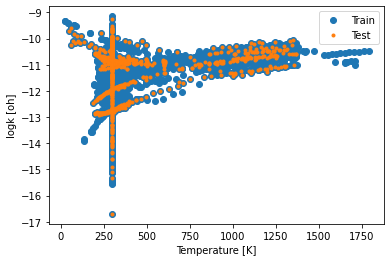

In [4]:
plt.plot(df['T'],df['oh_logK'],'o',label='Train')
plt.plot(test_mols['T'],test_mols['oh_logK'],'.',label='Test')
plt.xlabel('Temperature [K]')
plt.ylabel('logk [oh]')
plt.legend()

# Arrhenius model:
## Define parameters

In [5]:
class param:
    split='Kfold'
    seed=10
    lr = 0.0003723
    hidden = [1500,1000,500]
    n_epochs = 1000
    weights = [10,1,1,1]
    bweights = [1,1,1,1]
    scheduler_step = 500
    scheduler_gamma = 0.1
    batch_size =1024
    num_folds = 5
    input_type = 'All'
    model_type = 'Arrhenius'
    dropout = 0.2302
    scale_features = True
    scale_targets = True
    batch_norm = False
    target = 'All'
    teston = 'Cl'


## Perform 5-fold cross-validation
CV results on the Arrhenius loss model:

In [ ]:
param.model_type = 'Arrhenius'
l=cross_validate(train_mols,param)

## Run ensamble of five

Set Seed to 10
####### Evaluating model 1 in an ensamble of 5 #######
Epoch: 1 	Training Loss: MSE = 1.183449 ; RMSE = 1.087864
Epoch: 1 	Training A Loss: MSE = 0.026382 ; RMSE = 0.162425
Epoch: 1 	Training B Loss: MSE = 0.028018 ; RMSE = 0.167385
Epoch: 1 	Training n Loss: MSE = 0.006256 ; RMSE = 0.079096
Epoch: 1 	Training Arrhenius Loss: MSE = 0.112279 ; RMSE = 0.335081
Epoch: 1 	Training Arrhenius Loss: MSE = 0.085414 ; RMSE = 0.292256
Epoch: 10 	Training Loss: MSE = 0.208521 ; RMSE = 0.456641
Epoch: 10 	Training A Loss: MSE = 0.023255 ; RMSE = 0.152495
Epoch: 10 	Training B Loss: MSE = 0.018572 ; RMSE = 0.136278
Epoch: 10 	Training n Loss: MSE = 0.005982 ; RMSE = 0.077343
Epoch: 10 	Training Arrhenius Loss: MSE = 0.016071 ; RMSE = 0.126772
Epoch: 10 	Training Arrhenius Loss: MSE = 0.015876 ; RMSE = 0.125999
Epoch: 20 	Training Loss: MSE = 0.104935 ; RMSE = 0.323937
Epoch: 20 	Training A Loss: MSE = 0.018397 ; RMSE = 0.135635
Epoch: 20 	Training B Loss: MSE = 0.012223 ; RMSE = 0.11

Epoch: 220 	Training Loss: MSE = 0.025036 ; RMSE = 0.158229
Epoch: 220 	Training A Loss: MSE = 0.001585 ; RMSE = 0.039810
Epoch: 220 	Training B Loss: MSE = 0.001277 ; RMSE = 0.035737
Epoch: 220 	Training n Loss: MSE = 0.000371 ; RMSE = 0.019256
Epoch: 220 	Training Arrhenius Loss: MSE = 0.002180 ; RMSE = 0.046694
Epoch: 220 	Training Arrhenius Loss: MSE = 0.002472 ; RMSE = 0.049720
Epoch: 230 	Training Loss: MSE = 0.020555 ; RMSE = 0.143371
Epoch: 230 	Training A Loss: MSE = 0.001435 ; RMSE = 0.037881
Epoch: 230 	Training B Loss: MSE = 0.001040 ; RMSE = 0.032251
Epoch: 230 	Training n Loss: MSE = 0.000358 ; RMSE = 0.018911
Epoch: 230 	Training Arrhenius Loss: MSE = 0.001772 ; RMSE = 0.042098
Epoch: 230 	Training Arrhenius Loss: MSE = 0.001847 ; RMSE = 0.042980
Epoch: 240 	Training Loss: MSE = 0.021267 ; RMSE = 0.145832
Epoch: 240 	Training A Loss: MSE = 0.001390 ; RMSE = 0.037277
Epoch: 240 	Training B Loss: MSE = 0.001059 ; RMSE = 0.032545
Epoch: 240 	Training n Loss: MSE = 0.000310 

Epoch: 440 	Training Loss: MSE = 0.012460 ; RMSE = 0.111626
Epoch: 440 	Training A Loss: MSE = 0.000689 ; RMSE = 0.026251
Epoch: 440 	Training B Loss: MSE = 0.000518 ; RMSE = 0.022765
Epoch: 440 	Training n Loss: MSE = 0.000175 ; RMSE = 0.013238
Epoch: 440 	Training Arrhenius Loss: MSE = 0.001108 ; RMSE = 0.033283
Epoch: 440 	Training Arrhenius Loss: MSE = 0.001765 ; RMSE = 0.042016
Epoch: 450 	Training Loss: MSE = 0.011837 ; RMSE = 0.108797
Epoch: 450 	Training A Loss: MSE = 0.000614 ; RMSE = 0.024785
Epoch: 450 	Training B Loss: MSE = 0.000446 ; RMSE = 0.021114
Epoch: 450 	Training n Loss: MSE = 0.000163 ; RMSE = 0.012762
Epoch: 450 	Training Arrhenius Loss: MSE = 0.001061 ; RMSE = 0.032579
Epoch: 450 	Training Arrhenius Loss: MSE = 0.001576 ; RMSE = 0.039697
Epoch: 460 	Training Loss: MSE = 0.012787 ; RMSE = 0.113078
Epoch: 460 	Training A Loss: MSE = 0.000662 ; RMSE = 0.025727
Epoch: 460 	Training B Loss: MSE = 0.000501 ; RMSE = 0.022391
Epoch: 460 	Training n Loss: MSE = 0.000276 

Epoch: 660 	Training Loss: MSE = 0.007801 ; RMSE = 0.088321
Epoch: 660 	Training A Loss: MSE = 0.000468 ; RMSE = 0.021626
Epoch: 660 	Training B Loss: MSE = 0.000426 ; RMSE = 0.020644
Epoch: 660 	Training n Loss: MSE = 0.000141 ; RMSE = 0.011870
Epoch: 660 	Training Arrhenius Loss: MSE = 0.000677 ; RMSE = 0.026011
Epoch: 660 	Training Arrhenius Loss: MSE = 0.001391 ; RMSE = 0.037290
Epoch: 670 	Training Loss: MSE = 0.008674 ; RMSE = 0.093133
Epoch: 670 	Training A Loss: MSE = 0.000535 ; RMSE = 0.023134
Epoch: 670 	Training B Loss: MSE = 0.000412 ; RMSE = 0.020290
Epoch: 670 	Training n Loss: MSE = 0.000134 ; RMSE = 0.011588
Epoch: 670 	Training Arrhenius Loss: MSE = 0.000759 ; RMSE = 0.027555
Epoch: 670 	Training Arrhenius Loss: MSE = 0.001340 ; RMSE = 0.036605
Epoch: 680 	Training Loss: MSE = 0.007354 ; RMSE = 0.085755
Epoch: 680 	Training A Loss: MSE = 0.000417 ; RMSE = 0.020410
Epoch: 680 	Training B Loss: MSE = 0.000322 ; RMSE = 0.017939
Epoch: 680 	Training n Loss: MSE = 0.000157 

Epoch: 880 	Training Loss: MSE = 0.006955 ; RMSE = 0.083394
Epoch: 880 	Training A Loss: MSE = 0.000438 ; RMSE = 0.020920
Epoch: 880 	Training B Loss: MSE = 0.000359 ; RMSE = 0.018953
Epoch: 880 	Training n Loss: MSE = 0.000138 ; RMSE = 0.011744
Epoch: 880 	Training Arrhenius Loss: MSE = 0.000602 ; RMSE = 0.024535
Epoch: 880 	Training Arrhenius Loss: MSE = 0.001347 ; RMSE = 0.036699
Epoch: 890 	Training Loss: MSE = 0.007669 ; RMSE = 0.087575
Epoch: 890 	Training A Loss: MSE = 0.000422 ; RMSE = 0.020546
Epoch: 890 	Training B Loss: MSE = 0.000298 ; RMSE = 0.017249
Epoch: 890 	Training n Loss: MSE = 0.000139 ; RMSE = 0.011804
Epoch: 890 	Training Arrhenius Loss: MSE = 0.000681 ; RMSE = 0.026097
Epoch: 890 	Training Arrhenius Loss: MSE = 0.001381 ; RMSE = 0.037157
Epoch: 900 	Training Loss: MSE = 0.007379 ; RMSE = 0.085899
Epoch: 900 	Training A Loss: MSE = 0.000392 ; RMSE = 0.019792
Epoch: 900 	Training B Loss: MSE = 0.000317 ; RMSE = 0.017791
Epoch: 900 	Training n Loss: MSE = 0.000142 

Epoch: 80 	Training Loss: MSE = 0.034505 ; RMSE = 0.185755
Epoch: 80 	Training A Loss: MSE = 0.003988 ; RMSE = 0.063149
Epoch: 80 	Training B Loss: MSE = 0.002456 ; RMSE = 0.049557
Epoch: 80 	Training n Loss: MSE = 0.001014 ; RMSE = 0.031837
Epoch: 80 	Training Arrhenius Loss: MSE = 0.002705 ; RMSE = 0.052007
Epoch: 80 	Training Arrhenius Loss: MSE = 0.003380 ; RMSE = 0.058139
Epoch: 90 	Training Loss: MSE = 0.036668 ; RMSE = 0.191488
Epoch: 90 	Training A Loss: MSE = 0.004842 ; RMSE = 0.069587
Epoch: 90 	Training B Loss: MSE = 0.002857 ; RMSE = 0.053448
Epoch: 90 	Training n Loss: MSE = 0.000978 ; RMSE = 0.031277
Epoch: 90 	Training Arrhenius Loss: MSE = 0.002799 ; RMSE = 0.052906
Epoch: 90 	Training Arrhenius Loss: MSE = 0.003293 ; RMSE = 0.057385
Epoch: 100 	Training Loss: MSE = 0.029253 ; RMSE = 0.171035
Epoch: 100 	Training A Loss: MSE = 0.003037 ; RMSE = 0.055105
Epoch: 100 	Training B Loss: MSE = 0.002090 ; RMSE = 0.045711
Epoch: 100 	Training n Loss: MSE = 0.000808 ; RMSE = 0.0

Epoch: 300 	Training Loss: MSE = 0.016990 ; RMSE = 0.130347
Epoch: 300 	Training A Loss: MSE = 0.001268 ; RMSE = 0.035610
Epoch: 300 	Training B Loss: MSE = 0.000900 ; RMSE = 0.029996
Epoch: 300 	Training n Loss: MSE = 0.000269 ; RMSE = 0.016416
Epoch: 300 	Training Arrhenius Loss: MSE = 0.001455 ; RMSE = 0.038148
Epoch: 300 	Training Arrhenius Loss: MSE = 0.002677 ; RMSE = 0.051742
Epoch: 310 	Training Loss: MSE = 0.015836 ; RMSE = 0.125840
Epoch: 310 	Training A Loss: MSE = 0.001356 ; RMSE = 0.036817
Epoch: 310 	Training B Loss: MSE = 0.000977 ; RMSE = 0.031258
Epoch: 310 	Training n Loss: MSE = 0.000235 ; RMSE = 0.015317
Epoch: 310 	Training Arrhenius Loss: MSE = 0.001327 ; RMSE = 0.036426
Epoch: 310 	Training Arrhenius Loss: MSE = 0.002228 ; RMSE = 0.047197
Epoch: 320 	Training Loss: MSE = 0.019556 ; RMSE = 0.139842
Epoch: 320 	Training A Loss: MSE = 0.001332 ; RMSE = 0.036498
Epoch: 320 	Training B Loss: MSE = 0.001046 ; RMSE = 0.032342
Epoch: 320 	Training n Loss: MSE = 0.000259 

Epoch: 520 	Training Loss: MSE = 0.008204 ; RMSE = 0.090574
Epoch: 520 	Training A Loss: MSE = 0.000658 ; RMSE = 0.025648
Epoch: 520 	Training B Loss: MSE = 0.000517 ; RMSE = 0.022729
Epoch: 520 	Training n Loss: MSE = 0.000169 ; RMSE = 0.012981
Epoch: 520 	Training Arrhenius Loss: MSE = 0.000686 ; RMSE = 0.026193
Epoch: 520 	Training Arrhenius Loss: MSE = 0.002129 ; RMSE = 0.046140
Epoch: 530 	Training Loss: MSE = 0.009497 ; RMSE = 0.097451
Epoch: 530 	Training A Loss: MSE = 0.000939 ; RMSE = 0.030643
Epoch: 530 	Training B Loss: MSE = 0.000777 ; RMSE = 0.027881
Epoch: 530 	Training n Loss: MSE = 0.000186 ; RMSE = 0.013638
Epoch: 530 	Training Arrhenius Loss: MSE = 0.000759 ; RMSE = 0.027558
Epoch: 530 	Training Arrhenius Loss: MSE = 0.002144 ; RMSE = 0.046304
Epoch: 540 	Training Loss: MSE = 0.008706 ; RMSE = 0.093306
Epoch: 540 	Training A Loss: MSE = 0.000579 ; RMSE = 0.024072
Epoch: 540 	Training B Loss: MSE = 0.000436 ; RMSE = 0.020886
Epoch: 540 	Training n Loss: MSE = 0.000172 

Epoch: 740 	Training Loss: MSE = 0.008038 ; RMSE = 0.089657
Epoch: 740 	Training A Loss: MSE = 0.000747 ; RMSE = 0.027325
Epoch: 740 	Training B Loss: MSE = 0.000540 ; RMSE = 0.023228
Epoch: 740 	Training n Loss: MSE = 0.000184 ; RMSE = 0.013583
Epoch: 740 	Training Arrhenius Loss: MSE = 0.000657 ; RMSE = 0.025627
Epoch: 740 	Training Arrhenius Loss: MSE = 0.002063 ; RMSE = 0.045417
Epoch: 750 	Training Loss: MSE = 0.007933 ; RMSE = 0.089069
Epoch: 750 	Training A Loss: MSE = 0.000539 ; RMSE = 0.023215
Epoch: 750 	Training B Loss: MSE = 0.000390 ; RMSE = 0.019742
Epoch: 750 	Training n Loss: MSE = 0.000177 ; RMSE = 0.013321
Epoch: 750 	Training Arrhenius Loss: MSE = 0.000683 ; RMSE = 0.026129
Epoch: 750 	Training Arrhenius Loss: MSE = 0.002067 ; RMSE = 0.045462
Epoch: 760 	Training Loss: MSE = 0.007208 ; RMSE = 0.084902
Epoch: 760 	Training A Loss: MSE = 0.000459 ; RMSE = 0.021424
Epoch: 760 	Training B Loss: MSE = 0.000382 ; RMSE = 0.019556
Epoch: 760 	Training n Loss: MSE = 0.000149 

Epoch: 960 	Training Loss: MSE = 0.007118 ; RMSE = 0.084368
Epoch: 960 	Training A Loss: MSE = 0.000578 ; RMSE = 0.024042
Epoch: 960 	Training B Loss: MSE = 0.000378 ; RMSE = 0.019438
Epoch: 960 	Training n Loss: MSE = 0.000148 ; RMSE = 0.012173
Epoch: 960 	Training Arrhenius Loss: MSE = 0.000601 ; RMSE = 0.024523
Epoch: 960 	Training Arrhenius Loss: MSE = 0.002031 ; RMSE = 0.045068
Epoch: 970 	Training Loss: MSE = 0.007473 ; RMSE = 0.086444
Epoch: 970 	Training A Loss: MSE = 0.000531 ; RMSE = 0.023036
Epoch: 970 	Training B Loss: MSE = 0.000395 ; RMSE = 0.019866
Epoch: 970 	Training n Loss: MSE = 0.000135 ; RMSE = 0.011623
Epoch: 970 	Training Arrhenius Loss: MSE = 0.000641 ; RMSE = 0.025322
Epoch: 970 	Training Arrhenius Loss: MSE = 0.002112 ; RMSE = 0.045955
Epoch: 980 	Training Loss: MSE = 0.006844 ; RMSE = 0.082726
Epoch: 980 	Training A Loss: MSE = 0.000826 ; RMSE = 0.028734
Epoch: 980 	Training B Loss: MSE = 0.000491 ; RMSE = 0.022157
Epoch: 980 	Training n Loss: MSE = 0.000158 

Epoch: 160 	Training Loss: MSE = 0.022720 ; RMSE = 0.150730
Epoch: 160 	Training A Loss: MSE = 0.002366 ; RMSE = 0.048638
Epoch: 160 	Training B Loss: MSE = 0.001899 ; RMSE = 0.043581
Epoch: 160 	Training n Loss: MSE = 0.000507 ; RMSE = 0.022519
Epoch: 160 	Training Arrhenius Loss: MSE = 0.001795 ; RMSE = 0.042365
Epoch: 160 	Training Arrhenius Loss: MSE = 0.001880 ; RMSE = 0.043359
Epoch: 170 	Training Loss: MSE = 0.020887 ; RMSE = 0.144523
Epoch: 170 	Training A Loss: MSE = 0.001412 ; RMSE = 0.037578
Epoch: 170 	Training B Loss: MSE = 0.001038 ; RMSE = 0.032222
Epoch: 170 	Training n Loss: MSE = 0.000454 ; RMSE = 0.021305
Epoch: 170 	Training Arrhenius Loss: MSE = 0.001798 ; RMSE = 0.042406
Epoch: 170 	Training Arrhenius Loss: MSE = 0.001740 ; RMSE = 0.041708
Epoch: 180 	Training Loss: MSE = 0.019804 ; RMSE = 0.140726
Epoch: 180 	Training A Loss: MSE = 0.001277 ; RMSE = 0.035737
Epoch: 180 	Training B Loss: MSE = 0.000978 ; RMSE = 0.031280
Epoch: 180 	Training n Loss: MSE = 0.000422 

Epoch: 380 	Training Loss: MSE = 0.012608 ; RMSE = 0.112286
Epoch: 380 	Training A Loss: MSE = 0.001033 ; RMSE = 0.032138
Epoch: 380 	Training B Loss: MSE = 0.000623 ; RMSE = 0.024957
Epoch: 380 	Training n Loss: MSE = 0.000225 ; RMSE = 0.014993
Epoch: 380 	Training Arrhenius Loss: MSE = 0.001073 ; RMSE = 0.032753
Epoch: 380 	Training Arrhenius Loss: MSE = 0.001396 ; RMSE = 0.037367
Epoch: 390 	Training Loss: MSE = 0.012583 ; RMSE = 0.112174
Epoch: 390 	Training A Loss: MSE = 0.000848 ; RMSE = 0.029115
Epoch: 390 	Training B Loss: MSE = 0.000653 ; RMSE = 0.025561
Epoch: 390 	Training n Loss: MSE = 0.000284 ; RMSE = 0.016843
Epoch: 390 	Training Arrhenius Loss: MSE = 0.001080 ; RMSE = 0.032861
Epoch: 390 	Training Arrhenius Loss: MSE = 0.001846 ; RMSE = 0.042961
Epoch: 400 	Training Loss: MSE = 0.016356 ; RMSE = 0.127892
Epoch: 400 	Training A Loss: MSE = 0.000781 ; RMSE = 0.027939
Epoch: 400 	Training B Loss: MSE = 0.000612 ; RMSE = 0.024743
Epoch: 400 	Training n Loss: MSE = 0.000229 

Epoch: 600 	Training Loss: MSE = 0.007463 ; RMSE = 0.086390
Epoch: 600 	Training A Loss: MSE = 0.000653 ; RMSE = 0.025548
Epoch: 600 	Training B Loss: MSE = 0.000470 ; RMSE = 0.021680
Epoch: 600 	Training n Loss: MSE = 0.000181 ; RMSE = 0.013465
Epoch: 600 	Training Arrhenius Loss: MSE = 0.000616 ; RMSE = 0.024818
Epoch: 600 	Training Arrhenius Loss: MSE = 0.001324 ; RMSE = 0.036381
Epoch: 610 	Training Loss: MSE = 0.008588 ; RMSE = 0.092674
Epoch: 610 	Training A Loss: MSE = 0.000906 ; RMSE = 0.030106
Epoch: 610 	Training B Loss: MSE = 0.000711 ; RMSE = 0.026673
Epoch: 610 	Training n Loss: MSE = 0.000159 ; RMSE = 0.012602
Epoch: 610 	Training Arrhenius Loss: MSE = 0.000681 ; RMSE = 0.026099
Epoch: 610 	Training Arrhenius Loss: MSE = 0.001318 ; RMSE = 0.036305
Epoch: 620 	Training Loss: MSE = 0.007428 ; RMSE = 0.086184
Epoch: 620 	Training A Loss: MSE = 0.000510 ; RMSE = 0.022583
Epoch: 620 	Training B Loss: MSE = 0.000406 ; RMSE = 0.020154
Epoch: 620 	Training n Loss: MSE = 0.000156 

Epoch: 820 	Training Loss: MSE = 0.006511 ; RMSE = 0.080689
Epoch: 820 	Training A Loss: MSE = 0.000419 ; RMSE = 0.020464
Epoch: 820 	Training B Loss: MSE = 0.000308 ; RMSE = 0.017549
Epoch: 820 	Training n Loss: MSE = 0.000163 ; RMSE = 0.012759
Epoch: 820 	Training Arrhenius Loss: MSE = 0.000562 ; RMSE = 0.023709
Epoch: 820 	Training Arrhenius Loss: MSE = 0.001291 ; RMSE = 0.035931
Epoch: 830 	Training Loss: MSE = 0.006695 ; RMSE = 0.081825
Epoch: 830 	Training A Loss: MSE = 0.000400 ; RMSE = 0.019992
Epoch: 830 	Training B Loss: MSE = 0.000319 ; RMSE = 0.017854
Epoch: 830 	Training n Loss: MSE = 0.000171 ; RMSE = 0.013067
Epoch: 830 	Training Arrhenius Loss: MSE = 0.000581 ; RMSE = 0.024096
Epoch: 830 	Training Arrhenius Loss: MSE = 0.001199 ; RMSE = 0.034629
Epoch: 840 	Training Loss: MSE = 0.006594 ; RMSE = 0.081203
Epoch: 840 	Training A Loss: MSE = 0.000509 ; RMSE = 0.022568
Epoch: 840 	Training B Loss: MSE = 0.000416 ; RMSE = 0.020391
Epoch: 840 	Training n Loss: MSE = 0.000138 

Epoch: 20 	Training Loss: MSE = 0.101551 ; RMSE = 0.318670
Epoch: 20 	Training A Loss: MSE = 0.019880 ; RMSE = 0.140996
Epoch: 20 	Training B Loss: MSE = 0.012527 ; RMSE = 0.111924
Epoch: 20 	Training n Loss: MSE = 0.005047 ; RMSE = 0.071044
Epoch: 20 	Training Arrhenius Loss: MSE = 0.006410 ; RMSE = 0.080060
Epoch: 20 	Training Arrhenius Loss: MSE = 0.006530 ; RMSE = 0.080806
Epoch: 30 	Training Loss: MSE = 0.072958 ; RMSE = 0.270107
Epoch: 30 	Training A Loss: MSE = 0.016879 ; RMSE = 0.129918
Epoch: 30 	Training B Loss: MSE = 0.010034 ; RMSE = 0.100172
Epoch: 30 	Training n Loss: MSE = 0.004739 ; RMSE = 0.068841
Epoch: 30 	Training Arrhenius Loss: MSE = 0.004131 ; RMSE = 0.064269
Epoch: 30 	Training Arrhenius Loss: MSE = 0.003831 ; RMSE = 0.061898
Epoch: 40 	Training Loss: MSE = 0.056751 ; RMSE = 0.238224
Epoch: 40 	Training A Loss: MSE = 0.012194 ; RMSE = 0.110426
Epoch: 40 	Training B Loss: MSE = 0.006439 ; RMSE = 0.080241
Epoch: 40 	Training n Loss: MSE = 0.004312 ; RMSE = 0.06566

Epoch: 240 	Training Loss: MSE = 0.013349 ; RMSE = 0.115538
Epoch: 240 	Training A Loss: MSE = 0.001075 ; RMSE = 0.032794
Epoch: 240 	Training B Loss: MSE = 0.000831 ; RMSE = 0.028831
Epoch: 240 	Training n Loss: MSE = 0.000282 ; RMSE = 0.016798
Epoch: 240 	Training Arrhenius Loss: MSE = 0.001116 ; RMSE = 0.033407
Epoch: 240 	Training Arrhenius Loss: MSE = 0.002397 ; RMSE = 0.048955
Epoch: 250 	Training Loss: MSE = 0.015482 ; RMSE = 0.124428
Epoch: 250 	Training A Loss: MSE = 0.002030 ; RMSE = 0.045055
Epoch: 250 	Training B Loss: MSE = 0.001434 ; RMSE = 0.037864
Epoch: 250 	Training n Loss: MSE = 0.000287 ; RMSE = 0.016939
Epoch: 250 	Training Arrhenius Loss: MSE = 0.001173 ; RMSE = 0.034251
Epoch: 250 	Training Arrhenius Loss: MSE = 0.002090 ; RMSE = 0.045714
Epoch: 260 	Training Loss: MSE = 0.012245 ; RMSE = 0.110655
Epoch: 260 	Training A Loss: MSE = 0.000944 ; RMSE = 0.030731
Epoch: 260 	Training B Loss: MSE = 0.000701 ; RMSE = 0.026468
Epoch: 260 	Training n Loss: MSE = 0.000252 

Epoch: 460 	Training Loss: MSE = 0.009328 ; RMSE = 0.096581
Epoch: 460 	Training A Loss: MSE = 0.000454 ; RMSE = 0.021310
Epoch: 460 	Training B Loss: MSE = 0.000375 ; RMSE = 0.019363
Epoch: 460 	Training n Loss: MSE = 0.000151 ; RMSE = 0.012303
Epoch: 460 	Training Arrhenius Loss: MSE = 0.000835 ; RMSE = 0.028892
Epoch: 460 	Training Arrhenius Loss: MSE = 0.001957 ; RMSE = 0.044235
Epoch: 470 	Training Loss: MSE = 0.010362 ; RMSE = 0.101796
Epoch: 470 	Training A Loss: MSE = 0.000570 ; RMSE = 0.023866
Epoch: 470 	Training B Loss: MSE = 0.000486 ; RMSE = 0.022039
Epoch: 470 	Training n Loss: MSE = 0.000183 ; RMSE = 0.013545
Epoch: 470 	Training Arrhenius Loss: MSE = 0.000912 ; RMSE = 0.030206
Epoch: 470 	Training Arrhenius Loss: MSE = 0.001982 ; RMSE = 0.044517
Epoch: 480 	Training Loss: MSE = 0.009748 ; RMSE = 0.098729
Epoch: 480 	Training A Loss: MSE = 0.000471 ; RMSE = 0.021693
Epoch: 480 	Training B Loss: MSE = 0.000368 ; RMSE = 0.019189
Epoch: 480 	Training n Loss: MSE = 0.000154 

Epoch: 680 	Training Loss: MSE = 0.006943 ; RMSE = 0.083327
Epoch: 680 	Training A Loss: MSE = 0.000521 ; RMSE = 0.022829
Epoch: 680 	Training B Loss: MSE = 0.000443 ; RMSE = 0.021057
Epoch: 680 	Training n Loss: MSE = 0.000185 ; RMSE = 0.013599
Epoch: 680 	Training Arrhenius Loss: MSE = 0.000579 ; RMSE = 0.024070
Epoch: 680 	Training Arrhenius Loss: MSE = 0.001945 ; RMSE = 0.044099
Epoch: 690 	Training Loss: MSE = 0.005934 ; RMSE = 0.077035
Epoch: 690 	Training A Loss: MSE = 0.000400 ; RMSE = 0.020006
Epoch: 690 	Training B Loss: MSE = 0.000306 ; RMSE = 0.017483
Epoch: 690 	Training n Loss: MSE = 0.000166 ; RMSE = 0.012898
Epoch: 690 	Training Arrhenius Loss: MSE = 0.000506 ; RMSE = 0.022499
Epoch: 690 	Training Arrhenius Loss: MSE = 0.001763 ; RMSE = 0.041990
Epoch: 700 	Training Loss: MSE = 0.007029 ; RMSE = 0.083840
Epoch: 700 	Training A Loss: MSE = 0.000560 ; RMSE = 0.023664
Epoch: 700 	Training B Loss: MSE = 0.000430 ; RMSE = 0.020733
Epoch: 700 	Training n Loss: MSE = 0.000170 

Epoch: 900 	Training Loss: MSE = 0.006368 ; RMSE = 0.079798
Epoch: 900 	Training A Loss: MSE = 0.000501 ; RMSE = 0.022393
Epoch: 900 	Training B Loss: MSE = 0.000392 ; RMSE = 0.019810
Epoch: 900 	Training n Loss: MSE = 0.000124 ; RMSE = 0.011148
Epoch: 900 	Training Arrhenius Loss: MSE = 0.000535 ; RMSE = 0.023129
Epoch: 900 	Training Arrhenius Loss: MSE = 0.001846 ; RMSE = 0.042966
Epoch: 910 	Training Loss: MSE = 0.005830 ; RMSE = 0.076354
Epoch: 910 	Training A Loss: MSE = 0.000395 ; RMSE = 0.019883
Epoch: 910 	Training B Loss: MSE = 0.000335 ; RMSE = 0.018291
Epoch: 910 	Training n Loss: MSE = 0.000126 ; RMSE = 0.011232
Epoch: 910 	Training Arrhenius Loss: MSE = 0.000497 ; RMSE = 0.022302
Epoch: 910 	Training Arrhenius Loss: MSE = 0.001859 ; RMSE = 0.043115
Epoch: 920 	Training Loss: MSE = 0.006891 ; RMSE = 0.083012
Epoch: 920 	Training A Loss: MSE = 0.000723 ; RMSE = 0.026890
Epoch: 920 	Training B Loss: MSE = 0.000592 ; RMSE = 0.024331
Epoch: 920 	Training n Loss: MSE = 0.000153 

Epoch: 100 	Training Loss: MSE = 0.034495 ; RMSE = 0.185729
Epoch: 100 	Training A Loss: MSE = 0.003953 ; RMSE = 0.062872
Epoch: 100 	Training B Loss: MSE = 0.002684 ; RMSE = 0.051806
Epoch: 100 	Training n Loss: MSE = 0.000744 ; RMSE = 0.027282
Epoch: 100 	Training Arrhenius Loss: MSE = 0.002711 ; RMSE = 0.052071
Epoch: 100 	Training Arrhenius Loss: MSE = 0.003000 ; RMSE = 0.054774
Epoch: 110 	Training Loss: MSE = 0.028395 ; RMSE = 0.168508
Epoch: 110 	Training A Loss: MSE = 0.002899 ; RMSE = 0.053846
Epoch: 110 	Training B Loss: MSE = 0.001803 ; RMSE = 0.042460
Epoch: 110 	Training n Loss: MSE = 0.000707 ; RMSE = 0.026580
Epoch: 110 	Training Arrhenius Loss: MSE = 0.002299 ; RMSE = 0.047944
Epoch: 110 	Training Arrhenius Loss: MSE = 0.002560 ; RMSE = 0.050594
Epoch: 120 	Training Loss: MSE = 0.031297 ; RMSE = 0.176910
Epoch: 120 	Training A Loss: MSE = 0.003710 ; RMSE = 0.060908
Epoch: 120 	Training B Loss: MSE = 0.002162 ; RMSE = 0.046501
Epoch: 120 	Training n Loss: MSE = 0.000638 

Epoch: 320 	Training Loss: MSE = 0.014153 ; RMSE = 0.118968
Epoch: 320 	Training A Loss: MSE = 0.000903 ; RMSE = 0.030048
Epoch: 320 	Training B Loss: MSE = 0.000691 ; RMSE = 0.026279
Epoch: 320 	Training n Loss: MSE = 0.000320 ; RMSE = 0.017901
Epoch: 320 	Training Arrhenius Loss: MSE = 0.001224 ; RMSE = 0.034985
Epoch: 320 	Training Arrhenius Loss: MSE = 0.002198 ; RMSE = 0.046885
Epoch: 330 	Training Loss: MSE = 0.013592 ; RMSE = 0.116587
Epoch: 330 	Training A Loss: MSE = 0.000801 ; RMSE = 0.028305
Epoch: 330 	Training B Loss: MSE = 0.000591 ; RMSE = 0.024304
Epoch: 330 	Training n Loss: MSE = 0.000265 ; RMSE = 0.016271
Epoch: 330 	Training Arrhenius Loss: MSE = 0.001194 ; RMSE = 0.034548
Epoch: 330 	Training Arrhenius Loss: MSE = 0.001832 ; RMSE = 0.042798
Epoch: 340 	Training Loss: MSE = 0.029949 ; RMSE = 0.173057
Epoch: 340 	Training A Loss: MSE = 0.001257 ; RMSE = 0.035451
Epoch: 340 	Training B Loss: MSE = 0.001015 ; RMSE = 0.031853
Epoch: 340 	Training n Loss: MSE = 0.000318 

Epoch: 540 	Training Loss: MSE = 0.008564 ; RMSE = 0.092543
Epoch: 540 	Training A Loss: MSE = 0.000523 ; RMSE = 0.022863
Epoch: 540 	Training B Loss: MSE = 0.000383 ; RMSE = 0.019558
Epoch: 540 	Training n Loss: MSE = 0.000172 ; RMSE = 0.013122
Epoch: 540 	Training Arrhenius Loss: MSE = 0.000749 ; RMSE = 0.027362
Epoch: 540 	Training Arrhenius Loss: MSE = 0.001759 ; RMSE = 0.041936
Epoch: 550 	Training Loss: MSE = 0.009087 ; RMSE = 0.095328
Epoch: 550 	Training A Loss: MSE = 0.000503 ; RMSE = 0.022425
Epoch: 550 	Training B Loss: MSE = 0.000413 ; RMSE = 0.020321
Epoch: 550 	Training n Loss: MSE = 0.000169 ; RMSE = 0.013008
Epoch: 550 	Training Arrhenius Loss: MSE = 0.000800 ; RMSE = 0.028289
Epoch: 550 	Training Arrhenius Loss: MSE = 0.001795 ; RMSE = 0.042371
Epoch: 560 	Training Loss: MSE = 0.008610 ; RMSE = 0.092791
Epoch: 560 	Training A Loss: MSE = 0.000593 ; RMSE = 0.024342
Epoch: 560 	Training B Loss: MSE = 0.000406 ; RMSE = 0.020160
Epoch: 560 	Training n Loss: MSE = 0.000177 

Epoch: 760 	Training Loss: MSE = 0.008095 ; RMSE = 0.089975
Epoch: 760 	Training A Loss: MSE = 0.000446 ; RMSE = 0.021124
Epoch: 760 	Training B Loss: MSE = 0.000362 ; RMSE = 0.019028
Epoch: 760 	Training n Loss: MSE = 0.000183 ; RMSE = 0.013513
Epoch: 760 	Training Arrhenius Loss: MSE = 0.000710 ; RMSE = 0.026654
Epoch: 760 	Training Arrhenius Loss: MSE = 0.001723 ; RMSE = 0.041508
Epoch: 770 	Training Loss: MSE = 0.008520 ; RMSE = 0.092301
Epoch: 770 	Training A Loss: MSE = 0.000803 ; RMSE = 0.028344
Epoch: 770 	Training B Loss: MSE = 0.000610 ; RMSE = 0.024707
Epoch: 770 	Training n Loss: MSE = 0.000248 ; RMSE = 0.015742
Epoch: 770 	Training Arrhenius Loss: MSE = 0.000686 ; RMSE = 0.026188
Epoch: 770 	Training Arrhenius Loss: MSE = 0.001710 ; RMSE = 0.041352
Epoch: 780 	Training Loss: MSE = 0.007260 ; RMSE = 0.085206
Epoch: 780 	Training A Loss: MSE = 0.000507 ; RMSE = 0.022520
Epoch: 780 	Training B Loss: MSE = 0.000373 ; RMSE = 0.019302
Epoch: 780 	Training n Loss: MSE = 0.000156 

Epoch: 980 	Training Loss: MSE = 0.007919 ; RMSE = 0.088987
Epoch: 980 	Training A Loss: MSE = 0.000617 ; RMSE = 0.024831
Epoch: 980 	Training B Loss: MSE = 0.000464 ; RMSE = 0.021537
Epoch: 980 	Training n Loss: MSE = 0.000162 ; RMSE = 0.012747
Epoch: 980 	Training Arrhenius Loss: MSE = 0.000668 ; RMSE = 0.025838
Epoch: 980 	Training Arrhenius Loss: MSE = 0.001821 ; RMSE = 0.042670
Epoch: 990 	Training Loss: MSE = 0.007376 ; RMSE = 0.085881
Epoch: 990 	Training A Loss: MSE = 0.000567 ; RMSE = 0.023806
Epoch: 990 	Training B Loss: MSE = 0.000399 ; RMSE = 0.019971
Epoch: 990 	Training n Loss: MSE = 0.000228 ; RMSE = 0.015104
Epoch: 990 	Training Arrhenius Loss: MSE = 0.000618 ; RMSE = 0.024863
Epoch: 990 	Training Arrhenius Loss: MSE = 0.001738 ; RMSE = 0.041692
Epoch: 1000 	Training Loss: MSE = 0.007482 ; RMSE = 0.086500
Epoch: 1000 	Training A Loss: MSE = 0.000590 ; RMSE = 0.024290
Epoch: 1000 	Training B Loss: MSE = 0.000425 ; RMSE = 0.020605
Epoch: 1000 	Training n Loss: MSE = 0.000

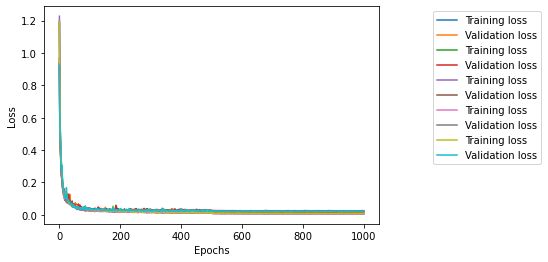

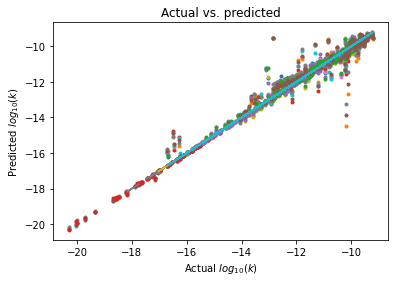

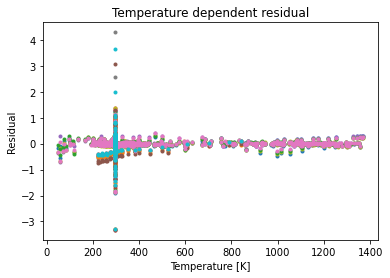

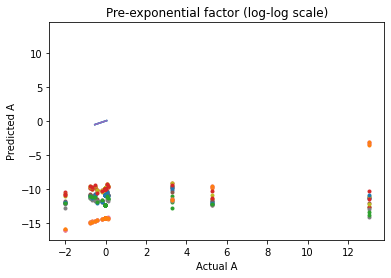

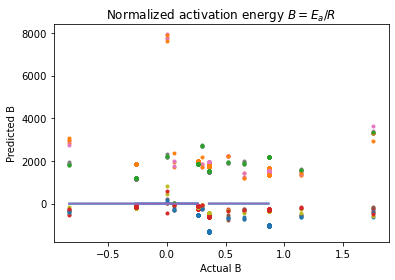

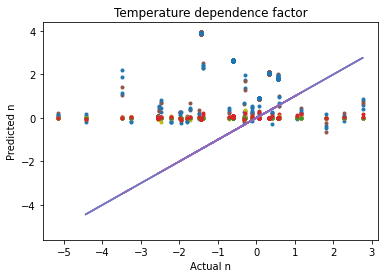

In [6]:
param.model_type = 'Arrhenius'
Prediction = run_ensamble(options_test,param)

In [7]:
def evaluate_ensamble(Prediction,test_mols,param):
    if param.target == 'All':
        tlabels= ((train_mols.columns == 'oh_logK')|(train_mols.columns == 'o3_logK')|(train_mols.columns == 'no3_logK')|(train_mols.columns == 'cl_logK'))
        ens_Prediction = Prediction.mean(axis=-1)
        test_target = test_mols.loc[:,tlabels]
        print(np.sqrt(np.mean((ens_Prediction-test_target)**2)))
        plt.figure()
        plot_results(test_target,ens_Prediction,test_mols['T'])
    else:
        ens_Prediction = Prediction.mean(axis=-1).reshape(Prediction.shape[0])
        mol = target_names[target_mols.index(param.target)]
        test_target = test_mols.dropna(subset=[mol])[mol]
        temperature = test_mols.dropna(subset=[mol])['T']
        print('Ensamble RMS =',np.sqrt(np.mean((ens_Prediction-test_target)**2)))
        plt.figure()
        plot_results(test_target,ens_Prediction,temperature)
        plt.figure()
        plt.plot(test_mols.dropna(subset=['oh_logK'])['oh_Unc.'],-np.abs((test_mols.dropna(subset=['oh_logK'])['oh_logK'])-ens_Prediction)/(test_mols.dropna(subset=['oh_logK'])['oh_logK']),'.')
        plt.plot(test_mols.dropna(subset=['oh_logK'])['oh_Unc.'],test_mols.dropna(subset=['oh_logK'])['oh_Unc.'])
        

oh_logK     0.127469
o3_logK     0.047708
no3_logK    0.050282
cl_logK     0.506479
dtype: float64


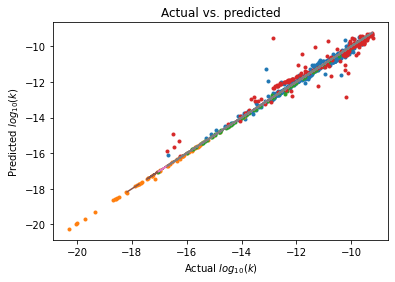

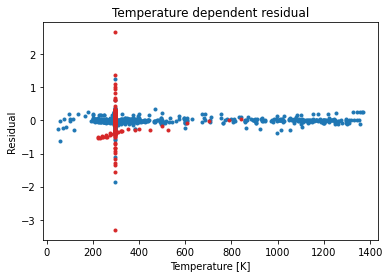

In [9]:
evaluate_ensamble(Prediction,test_mols,param)

# Point model
CV results on the point prediction model:

In [ ]:
param.lr = 1e-4
param.hidden = [500,300,50]
param.n_epochs = 20
param.scheduler_step = 100
param.scheduler_gamma = 0.1
param.batch_size = 32
param.num_folds = 5
param.input_type = 'All'
param.dropout = 0.25
param.model_type = 'Point'
scale_features = True
scale_targets = True
l=cross_validate(train_mols,param)

Point prediction model:

In [ ]:
Prediction = run_ensamble(options_test,param)

In [ ]:
print('Ensamble RMSE =',np.sqrt(np.mean((Prediction.mean(axis=-1)-test_mols.logK)**2)))
plot_results(test_mols.logK,Prediction.mean(axis=-1),test_mols['T'])